In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Read Image Function

In [2]:
def Read_img(path):
    img= open(path,"r")
    g= img.readline()
    c= img.readline()
    rc= img.readline()
    max= img.readline()
    
    [col,row]=[int (i) for i in rc.split()]
    k=np.zeros((row,col),np.int64)
    for i in range (row):
        for j in range(col):
            k[i,j]=img.readline()
    
    img.close()
    plt.imshow(k,cmap='gray')
    return k,g,c,rc,max,col,row

#### Store/Write O/p Image Function

In [3]:
def Write_img(path,k,g,c,rc,max,col,row):
    img= open(path,"w")
    img.write(g)
    img.write(c)
    img.write(rc)
    img.write(max)
    
    for i in range(row):
        for j in range(col):
            img.write("%d\n"%k[i,j])
    img.close()

#### Add Padding Function

In [4]:
def add_padding(arr,row,col,k_size):
    pd_size= (k_size-1)//2
    n_row=row+pd_size*2
    n_col=col+pd_size*2
    new_arr= np.zeros((n_row,n_col),np.int64)
    for i in range(pd_size,row+pd_size):
        for j in range(pd_size,col+pd_size):
            new_arr[i,j]=arr[i-pd_size,j-pd_size]
    return new_arr,n_row,n_col


In [5]:
arr=np.ones((8,8),np.int64)
print(arr)
new= add_padding(arr,8,8,3)
print(new)

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64), 10, 10)


#### Erosion Function

In [6]:
def erosion3(arr,row,col,k_arr):
    e_set=np.zeros((row,col),np.int64)
    for i in range(row):
        for j in range(col):
            if( arr[i,j]==k_arr[1,1] and arr[i-1,j-1]==k_arr[0,0] and arr[i-1,j]==k_arr[0,1] and arr[i-1,j+1]==k_arr[2,0] and arr[i,j-1]==k_arr[1,0] and arr[i,j+1]==k_arr[1,2] and arr[i+1,j-1]==k_arr[2,0] and arr[i+1,j]==k_arr[2,1] and arr[i+1,j+1]==k_arr[2,2]):
                e_set[i,j]=255
    return e_set
    

#### Dilation Function

In [7]:
def dilation3(arr,row,col,k_arr):
    d_set=np.zeros((row,col),np.int64)
    for i in range(row):
        for j in range(col):
            if( arr[i,j]==k_arr[1,1] or arr[i-1,j-1]==k_arr[0,0] or arr[i-1,j]==k_arr[0,1] or arr[i-1,j+1]==k_arr[2,0] or arr[i,j-1]==k_arr[1,0] or arr[i,j+1]==k_arr[1,2] or arr[i+1,j-1]==k_arr[2,0] or arr[i+1,j]==k_arr[2,1] or arr[i+1,j+1]==k_arr[2,2]):
                d_set[i,j]=255
    return d_set

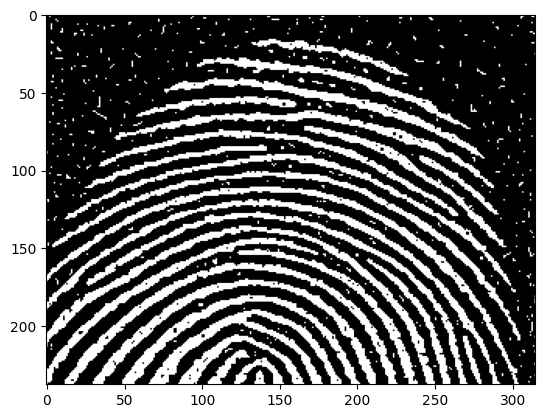

In [9]:
img,g,c,rc,max,col,row =Read_img("D:\educational\digital image processing\images\DIP3E_Original_Images_CH09\Fig0911(a)(noisy_fingerprint).pgm")

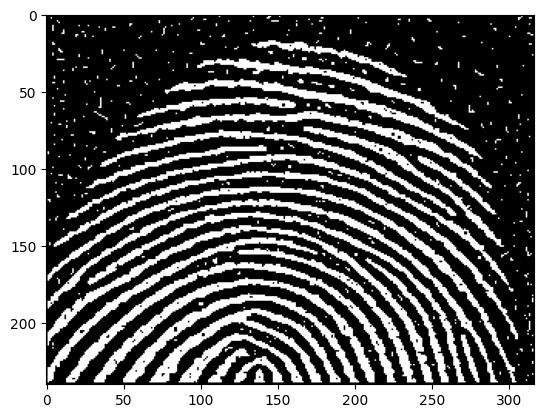

In [10]:
padded_img,n_row,n_col= add_padding(img,row,col,3)
plt.imshow(padded_img,cmap='gray')

[[255 255 255]
 [255 255 255]
 [255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


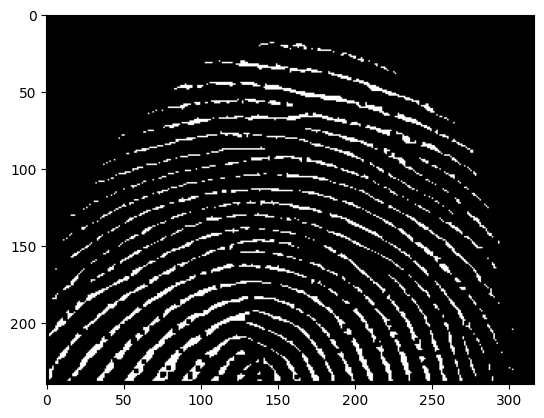

In [11]:
k_arr=np.full((3,3),255,np.int64)
print(k_arr)
e_set= erosion3(padded_img,n_row,n_col,k_arr)
plt.imshow(e_set,cmap='gray')
print(e_set)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]


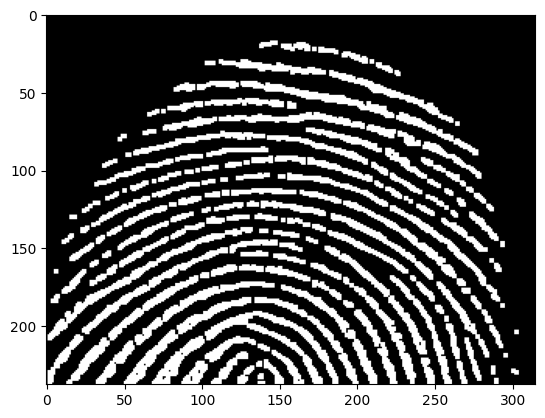

In [12]:
d_set= dilation3(e_set,n_row-2,n_col-2,k_arr)
plt.imshow(d_set,cmap='gray')
print(d_set)